In [24]:
import numpy as np
import numpy.random as ra
import numpy.linalg as la
import matplotlib.pyplot as plt

W = 32
H = 32

In [25]:
d0 = np.array(
    [
        [
            -1 if vr == e1r and vc == e1c else 1 if vr == e2r and vc == e2c else 0
            for vr in range(H) for vc in range(W)
        ]
        for e1r in range(H) for e1c in range(W) for (e2r, e2c) in [(e1r, e1c+1), (e1r+1, e1c)] if e2r < H and e2c < W
    ]
)

d1 = np.array(
    [
        [
            1 if e1r == pr and e1c == pc and e2r == pr+1 and e2c == pc else
            1 if e1r == pr+1 and e1c == pc and e2r == pr+1 and e2c == pc+1 else
            -1 if e1r == pr and e1c == pc and e2r == pr and e2c == pc+1 else
            -1 if e1r == pr and e1c == pc+1 and e2r == pr+1 and e2c == pc+1 else 0
            for e1r in range(H) for e1c in range(W) for (e2r, e2c) in [(e1r, e1c+1), (e1r+1, e1c)] if e2r < H and e2c < W
        ]
        for pr in range(H-1) for pc in range(W-1)
    ]
)

dstar1 = np.transpose(d0)
dstar2 = np.transpose(d1)

L0 = dstar1 @ d0
L1 = dstar2 @ d1 + d0 @ dstar1
L2 = d1 @ dstar2

np.save(f'data/{W}x{H}/matrices/d0',d0)
np.save(f'data/{W}x{H}/matrices/d1',d1)
np.save(f'data/{W}x{H}/matrices/dstar1',dstar1)
np.save(f'data/{W}x{H}/matrices/dstar2',dstar2)
np.save(f'data/{W}x{H}/matrices/L0',L0)
np.save(f'data/{W}x{H}/matrices/L1',L1)
np.save(f'data/{W}x{H}/matrices/L2',L2)

In [ ]:
d0 = np.load(f'data/{W}x{H}/matrices/d0')
d1 = np.load(f'data/{W}x{H}/matrices/d1')
dstar1 = np.load(f'data/{W}x{H}/matrices/dstar1')
dstar2 = np.load(f'data/{W}x{H}/matrices/dstar2')
L0 = np.load(f'data/{W}x{H}/matrices/L0')
L1 = np.load(f'data/{W}x{H}/matrices/L1')
L2 = np.load(f'data/{W}x{H}/matrices/L2')

In [29]:
theta = np.array([2*np.pi*ra.random() for vr in range(H) for vc in range(W)])
m = np.array([ 0 for e1r in range(H) for e1c in range(W) for (e2r, e2c) in [(e1r, e1c+1), (e1r+1, e1c)] if e2r < H and e2c < W])

def Hamiltonian(t,m):
    return np.sum((d0 @ t + 2*np.pi*m)**2)/2

Hold = Hamiltonian(theta, m)
Hnew = 0

for round in range(1000000):

    beta = np.log(1 + round/10000)

    proptheta = np.mod(theta + np.array([2*np.pi*ra.random() if ra.random() < 0.001 else 0 for vr in range(H) for vc in range(W)]), 2*np.pi)
    propm = m + np.array([ra.binomial(10,0.05) - ra.binomial(10,0.05) if ra.random() < 0.001 else 0
            for e1r in range(H) for e1c in range(W) for (e2r, e2c) in [(e1r, e1c+1), (e1r+1, e1c)] if e2r < H and e2c < W
    ])

    Hnew = Hamiltonian(proptheta, propm)

    if ra.random() < np.exp(- beta * (Hnew - Hold)):
        theta = proptheta
        m = propm
        Hold = Hnew
    
    if round % 100 == 0:
        np.save(f'data/{W}x{H}/theta/{round//100}', theta)
        np.save(f'data/{W}x{H}/q/{round//100}', d1 @ m)
        np.save(f'data/{W}x{H}/phi/{round//100}', theta + 2 * np.pi * dstar1 @ la.lstsq(L1, m)[0])


/var/folders/k5/czr0d7xn2w5456rcmtfxtnm80000gn/T/ipykernel_61117/2366564421.py:29: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.save(f'data/{W}x{H}/phi/{round//100}', theta + 2 * np.pi * dstar1 @ la.lstsq(L1, m)[0])


/var/folders/k5/czr0d7xn2w5456rcmtfxtnm80000gn/T/ipykernel_61117/1911507865.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  phi = theta + 2 * np.pi * dstar1 @ la.lstsq(L1, m)[0]


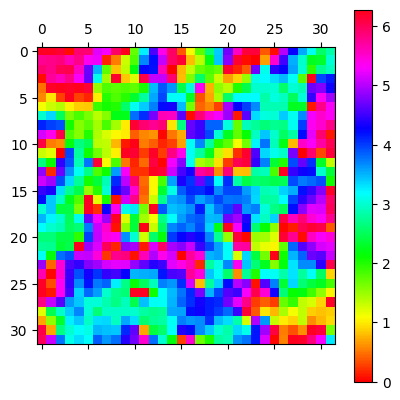

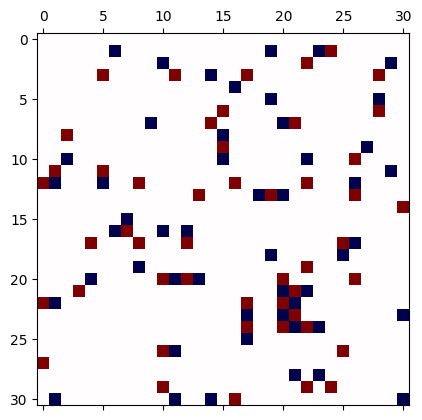

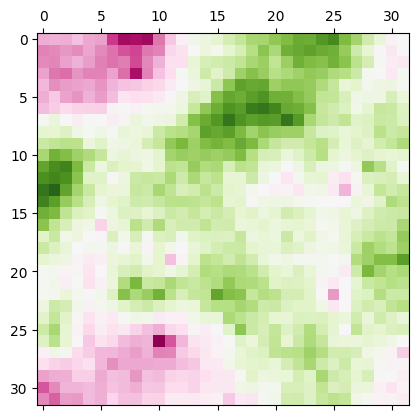

In [30]:
q = d1 @ m
phi = theta + 2 * np.pi * dstar1 @ la.lstsq(L1, m)[0]

plt.matshow(theta.reshape((H,W)), vmin=0, vmax=2*np.pi, cmap="hsv")
plt.colorbar()
plt.matshow(q.reshape((H-1,W-1)), cmap="seismic")
plt.matshow(phi.reshape((H,W)), cmap="PiYG")

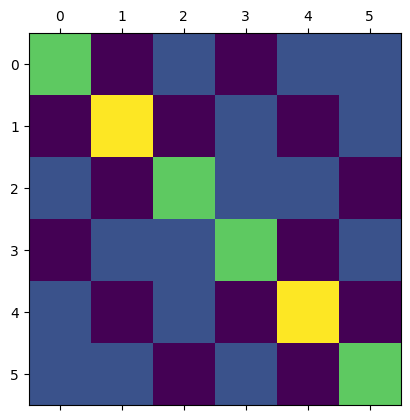

In [23]:
plt.matshow(L0)

In [12]:
np.log(100)

4.605170185988092

In [ ]:
list(range(1,2))

[1]